1. We will start with removing outliers. 
2. So far, we have discussed different methods to remove outliers. 
- Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.
3. Create a copy of the dataframe for the data wrangling.
4. Normalize the continuous variables. You can use any one method you want.
5. Encode the categorical variables
6. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.
7. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.
- Hint for Categorical Variables

You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):
1. One hot to state
2. Ordinal to coverage
3. Ordinal to employmentstatus
4. Ordinal to location code
5. One hot to marital status
6. One hot to policy type
7. One hot to policy
8. One hot to renew offercustomer_df
9. One hot to sales channel
10. One hot vehicle class
11. Ordinal vehicle size

- data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
- given that column "coverage" in the dataframe "data" has three categories:
- "basic", "extended", and "premium" and values are to be represented in the same order.

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)


In [2]:
customer_df = pd.read_csv("C:/Users/jw156/Ironhack/Day17/Afternoon/Lab/third_lab")

In [3]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate,1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal,3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal,1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate,1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal,1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df= customer_df.drop('customer', axis=1)

#### 1. We will start with removing outliers. 


In [5]:
customer_df['income'] = customer_df['income'].astype(float)
numerical=customer_df.select_dtypes(include=[np.number])
categorical=customer_df.select_dtypes(include=[np.object])

df_cat = pd.DataFrame()
df_discr = pd.DataFrame()
df_cont = pd.DataFrame()

def diff_concr_discr_cat(x):
    
    for i in x:
        if customer_df[i].dtype == 'object':
            df_cat[i] = customer_df[i]
        elif customer_df[i].dtype == 'int64':
            df_discr[i] = customer_df[i]
        elif customer_df[i].dtype == 'float64':
            df_cont[i] = customer_df[i]

diff_concr_discr_cat(list(customer_df.columns))


In [6]:
df_cont.head()

,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274.0,384.811147
1,6979.535903,0.0,1131.464935
2,12887.431650,48767.0,566.472247
3,7645.861827,0.0,529.881344
4,2813.692575,43836.0,138.130879


In [7]:
df_cat.head()

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal,Agent,Four-Door Car,Medsize


In [8]:
def cont_plot(df):
    cols=list(df.columns)
    
    for col in cols:
        sns.boxplot(df[col])
        plt.show()


In [9]:
def dis_plot(df):
    cols=list(df.columns)
    
    for col in cols:
        sns.distplot(df[col])
        plt.show()


In [10]:
def log_transfom_clean_(x):
    if np.isfinite(x) and x!=0: # If the value is finite and != 0...
        return np.log(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later


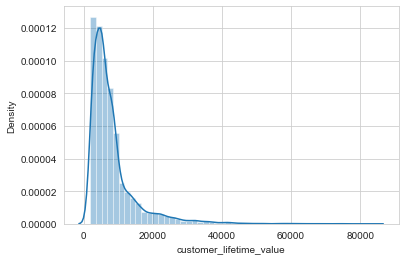

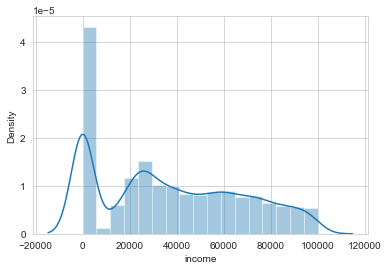

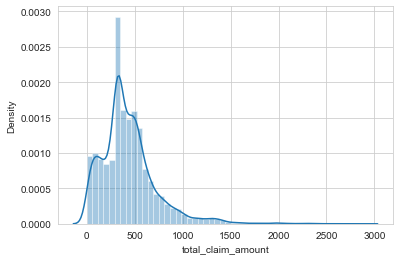

In [11]:
dis_plot(df_cont)

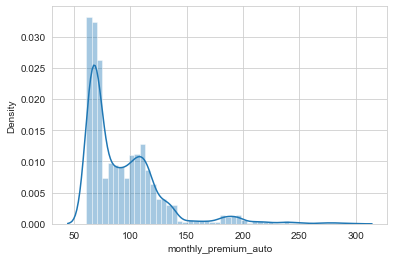

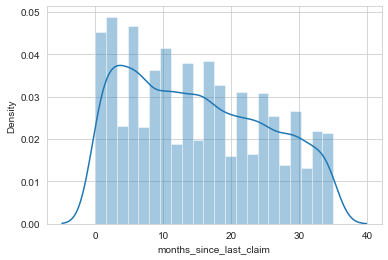

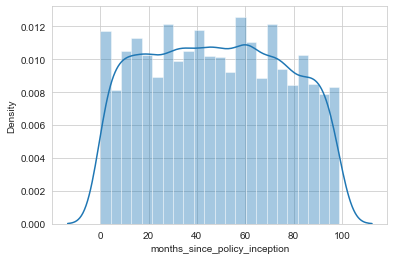

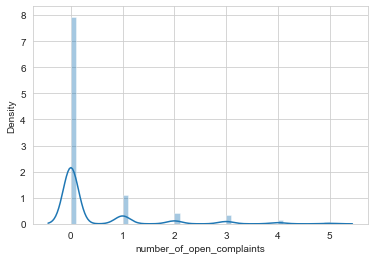

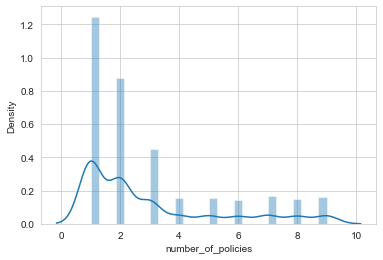

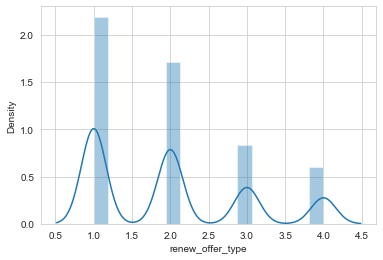

In [19]:
dis_plot(df_discr)

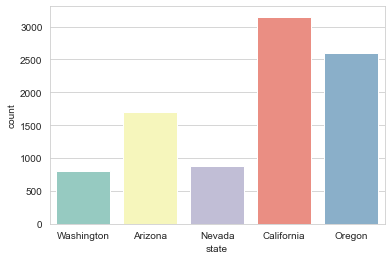

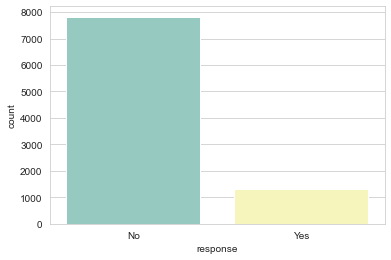

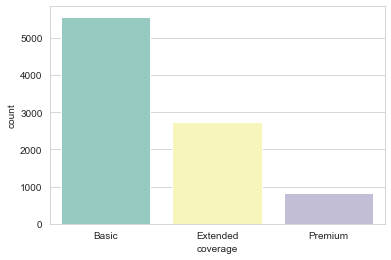

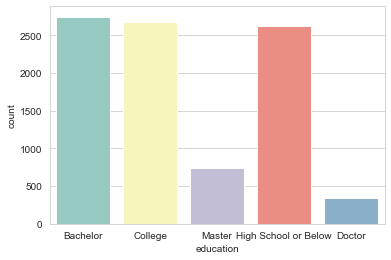

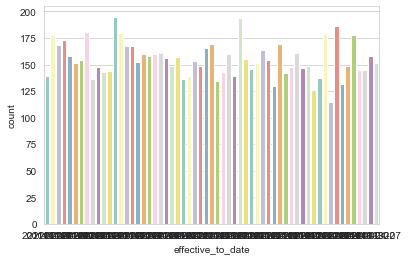

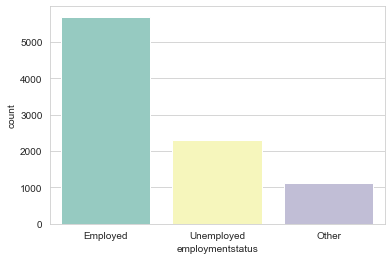

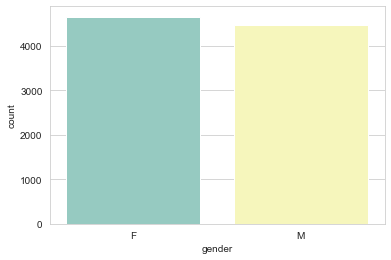

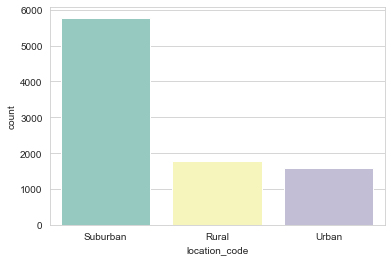

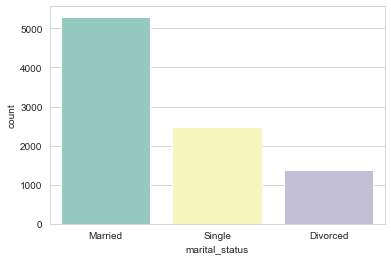

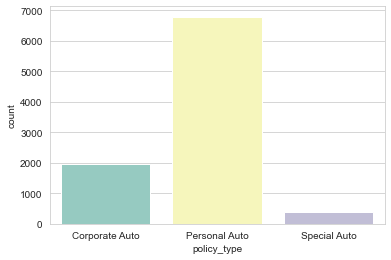

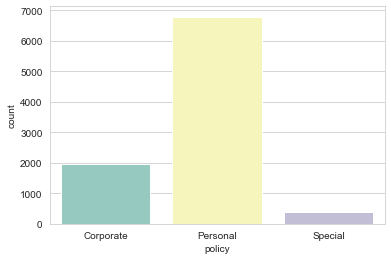

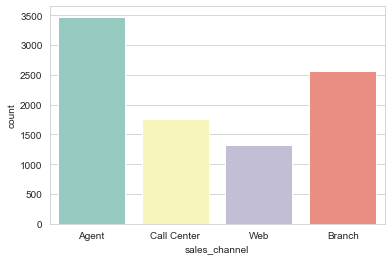

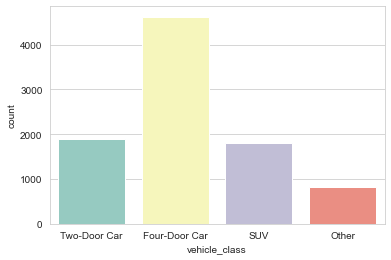

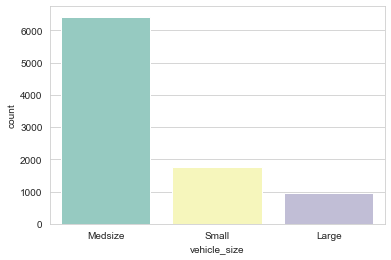

In [20]:
for col in df_cat.columns:
    sns.countplot(x=col, data=df_cat, palette="Set3")
    plt.show()

#### 2. So far, we have discussed different methods to remove outliers. 

In [21]:
def log_transfom_clean_(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN

In [22]:
customer_df['customer_lifetime_value'] = list(map(log_transfom_clean_, customer_df['customer_lifetime_value']))


In [23]:
customer_df['customer_lifetime_value']

0        7.924260
1        8.850738
2        9.464008
3        8.941920
4        7.942253
          ...    
9129    10.060747
9130     8.038031
9131     9.007476
9132     8.925912
9133     7.867809
Name: customer_lifetime_value, Length: 9134, dtype: float64

# 3. Create a copy of the dataframe for the data wrangling.


In [24]:
customer_wrangle = customer_df.copy()

# 4. Normalize the continuous variables. You can use any one method you want.


In [25]:
def standard_scales(df):
    cols = df.columns
    from sklearn.preprocessing import StandardScaler
    transformer = StandardScaler().fit(df)
    x_standardized = transformer.transform(df)
    return pd.DataFrame(x_standardized, columns=cols)

In [26]:
standard_scales(customer_df[['customer_lifetime_value', 'income']])

,customer_lifetime_value,income
0,-1.262556,0.612827
1,0.156500,-1.239617
2,1.095826,0.365710
3,0.296160,-1.239617
4,-1.234997,0.203390
...,...,...
9129,2.009832,1.128558
9130,-1.088297,-0.528450
9131,0.396571,-1.239617
9132,0.271642,-0.517356


# 5. Encode the categorical variables

1. One hot to state
2. Ordinal to coverage
3. Ordinal to employmentstatus
4. Ordinal to location code
5. One hot to marital status
6. One hot to policy type
7. One hot to policy
8. One hot to renew offercustomer_df
9. One hot to sales channel
10. One hot vehicle class
11. Ordinal vehicle size


In [27]:
dummies=customer_df[['state','marital_status','policy_type','policy','sales_channel', 'vehicle_class']]
df_cat_dummies = pd.get_dummies(dummies,drop_first = True)
customer_df.drop(dummies, axis=1, inplace = True)
customer_df=pd.concat([customer_df,df_cat_dummies],axis=1)


In [28]:
customer_df

,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,renew_offer_type,total_claim_amount,vehicle_size,state_California,state_Nevada,state_Oregon,state_Washington,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Personal,policy_Special,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Other,vehicle_class_SUV,vehicle_class_Two-Door Car
0,7.924260,No,Basic,Bachelor,2011-02-24,Employed,F,56274.0,Suburban,69,32,5,0,1,1,384.811147,Medsize,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
1,8.850738,No,Extended,Bachelor,2011-01-31,Unemployed,F,0.0,Suburban,94,13,42,0,8,3,1131.464935,Medsize,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0
2,9.464008,No,Premium,Bachelor,2011-02-19,Employed,F,48767.0,Suburban,108,18,38,0,2,1,566.472247,Medsize,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1
3,8.941920,No,Basic,Bachelor,2011-01-20,Unemployed,M,0.0,Suburban,106,18,65,0,7,1,529.881344,Medsize,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
4,7.942253,No,Basic,Bachelor,2011-02-03,Employed,M,43836.0,Rural,73,12,44,0,1,1,138.130879,Medsize,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,10.060747,No,Basic,Bachelor,2011-02-10,Employed,M,71941.0,Urban,73,18,89,0,2,2,198.234764,Medsize,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0
9130,8.038031,Yes,Extended,College,2011-02-12,Employed,F,21604.0,Suburban,79,14,28,0,1,1,379.200000,Medsize,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9131,9.007476,No,Extended,Bachelor,2011-02-06,Unemployed,M,0.0,Suburban,85,9,37,3,2,1,790.784983,Medsize,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
9132,8.925912,No,Extended,College,2011-02-03,Employed,M,21941.0,Suburban,96,34,3,0,3,3,691.200000,Large,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0


In [29]:
# def one_hot_coder(x):
#     return pd.get_dummies(x, prefix='Country', drop_first=True)
# dummy = customer_df.copy()

In [30]:
dummy = customer_df.copy()

In [31]:
customer_df["coverage"] = customer_df["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

In [32]:
dummy.coverage.unique()

array(['Basic', 'Extended', 'Premium'], dtype=object)

In [33]:
customer_df

,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,renew_offer_type,total_claim_amount,vehicle_size,state_California,state_Nevada,state_Oregon,state_Washington,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Personal,policy_Special,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Other,vehicle_class_SUV,vehicle_class_Two-Door Car
0,7.924260,No,0,Bachelor,2011-02-24,Employed,F,56274.0,Suburban,69,32,5,0,1,1,384.811147,Medsize,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
1,8.850738,No,1,Bachelor,2011-01-31,Unemployed,F,0.0,Suburban,94,13,42,0,8,3,1131.464935,Medsize,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0
2,9.464008,No,2,Bachelor,2011-02-19,Employed,F,48767.0,Suburban,108,18,38,0,2,1,566.472247,Medsize,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1
3,8.941920,No,0,Bachelor,2011-01-20,Unemployed,M,0.0,Suburban,106,18,65,0,7,1,529.881344,Medsize,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
4,7.942253,No,0,Bachelor,2011-02-03,Employed,M,43836.0,Rural,73,12,44,0,1,1,138.130879,Medsize,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,10.060747,No,0,Bachelor,2011-02-10,Employed,M,71941.0,Urban,73,18,89,0,2,2,198.234764,Medsize,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0
9130,8.038031,Yes,1,College,2011-02-12,Employed,F,21604.0,Suburban,79,14,28,0,1,1,379.200000,Medsize,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9131,9.007476,No,1,Bachelor,2011-02-06,Unemployed,M,0.0,Suburban,85,9,37,3,2,1,790.784983,Medsize,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
9132,8.925912,No,1,College,2011-02-03,Employed,M,21941.0,Suburban,96,34,3,0,3,3,691.200000,Large,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0


In [34]:
customer_df["employment_status"] = customer_df["employmentstatus"].map({"Employed" : 0, "Unemployed" : 1, "Other" : 2})

In [35]:
customer_df["location_code"] = customer_df["location_code"].map({"Suburban" : 0, "Rural" : 1, "Urban" : 2})

In [36]:
customer_df.location_code.unique()

array([0, 1, 2], dtype=int64)

In [37]:
customer_df.vehicle_size.unique()

array(['Medsize', 'Small', 'Large'], dtype=object)

In [38]:
customer_df["vehicle_size"] = customer_df["vehicle_size"].map({"Small" : 0, "Medsize" : 1, "Large" : 2})

In [41]:
customer_df = customer_df.drop(['gender', 'response', 'education'], axis=1)

# 6. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.


In [42]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], errors='coerce')

In [43]:
import datetime

def get_months(x):
    x = x.strftime("%m")
    return x

In [44]:
import datetime

def get_years(x):
    x = x.strftime("%Y")
    return x

In [45]:
def get_day(x):
    x = x.strftime("%j")
    return x

In [46]:
def get_week(x):
    x = x.strftime("%U")
    return x

In [47]:
customer_df['month'] = list(map(get_months, customer_df['effective_to_date']))

In [48]:
customer_df['month'] = pd.to_numeric(customer_df['month'], errors='coerce')

In [49]:
customer_df['year'] = list(map(get_years, customer_df['effective_to_date']))

In [50]:
customer_df['year'] = pd.to_numeric(customer_df['year'], errors='coerce')

In [51]:
customer_df['day'] = list(map(get_day, customer_df['effective_to_date']))

In [52]:
customer_df['day'] = pd.to_numeric(customer_df['day'], errors='coerce')

In [53]:
customer_df['week'] = list(map(get_week, customer_df['effective_to_date']))

In [54]:
customer_df['week'] = pd.to_numeric(customer_df['week'], errors='coerce')

In [55]:
customer_df['week'].unique()

array([8, 5, 7, 3, 4, 1, 6, 2, 9, 0], dtype=int64)

In [56]:
customer_df['day'].unique()

array([55, 31, 50, 20, 34, 25, 18, 26, 48, 52,  6, 37, 10, 17,  5, 58, 14,
       21, 36, 29, 59, 43, 33, 38, 22, 44, 15,  8, 11, 28, 39, 54,  2, 47,
       27, 23,  9, 42, 35, 32, 46, 57, 16,  1, 41, 24, 56, 12, 40, 19,  4,
       45, 51, 49,  3, 13, 30, 53,  7], dtype=int64)

In [57]:
customer_df['year'].unique()

array([2011], dtype=int64)

In [58]:
customer_df['month'].unique()

array([2, 1], dtype=int64)

In [59]:
customer_df.isnull().any()

customer_lifetime_value          False
coverage                         False
effective_to_date                False
employmentstatus                 False
income                           False
location_code                    False
monthly_premium_auto             False
months_since_last_claim          False
months_since_policy_inception    False
number_of_open_complaints        False
number_of_policies               False
renew_offer_type                 False
total_claim_amount               False
vehicle_size                     False
state_California                 False
state_Nevada                     False
state_Oregon                     False
state_Washington                 False
marital_status_Married           False
marital_status_Single            False
policy_type_Personal Auto        False
policy_type_Special Auto         False
policy_Personal                  False
policy_Special                   False
sales_channel_Branch             False
sales_channel_Call Center

# 7. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [60]:
concat = pd.concat([df_cat, df_cont], axis=1)

In [61]:
data_frame = pd.concat([concat, df_discr], axis=1)

In [62]:
customer_df = customer_df.drop(['effective_to_date'], axis=1)

In [63]:
customer_df.dtypes

customer_lifetime_value          float64
coverage                           int64
employmentstatus                  object
income                           float64
location_code                      int64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
renew_offer_type                   int64
total_claim_amount               float64
vehicle_size                       int64
state_California                   uint8
state_Nevada                       uint8
state_Oregon                       uint8
state_Washington                   uint8
marital_status_Married             uint8
marital_status_Single              uint8
policy_type_Personal Auto          uint8
policy_type_Special Auto           uint8
policy_Personal                    uint8
policy_Special                     uint8
sales_channel_Branch               uint8
sales_channel_Ca

In [64]:
customer_df.to_csv('fourth_csv', index=False)